# Quantum Phase Estimation (QPE)

### Juan Luis Salas Montoro

### 25/03/2025

## Introduction

This notebook implements the **Quantum Phase Estimation (QPE) algorithm**, which extracts the phase introduced by a unitary operator $\hat{U}$ on it's eigenvector $|w\rangle$. It is a modification of my previous work on this algorithm, developed for the Quantum Algorithms subject of my Master's degree. 

### Algorithm Overview

The circuit consists of controlled unitary operations and an **Inverse Quantum Fourier Transform (IQFT)** to extract the phase information. The number of qubits used determines the precision of the phase estimation.

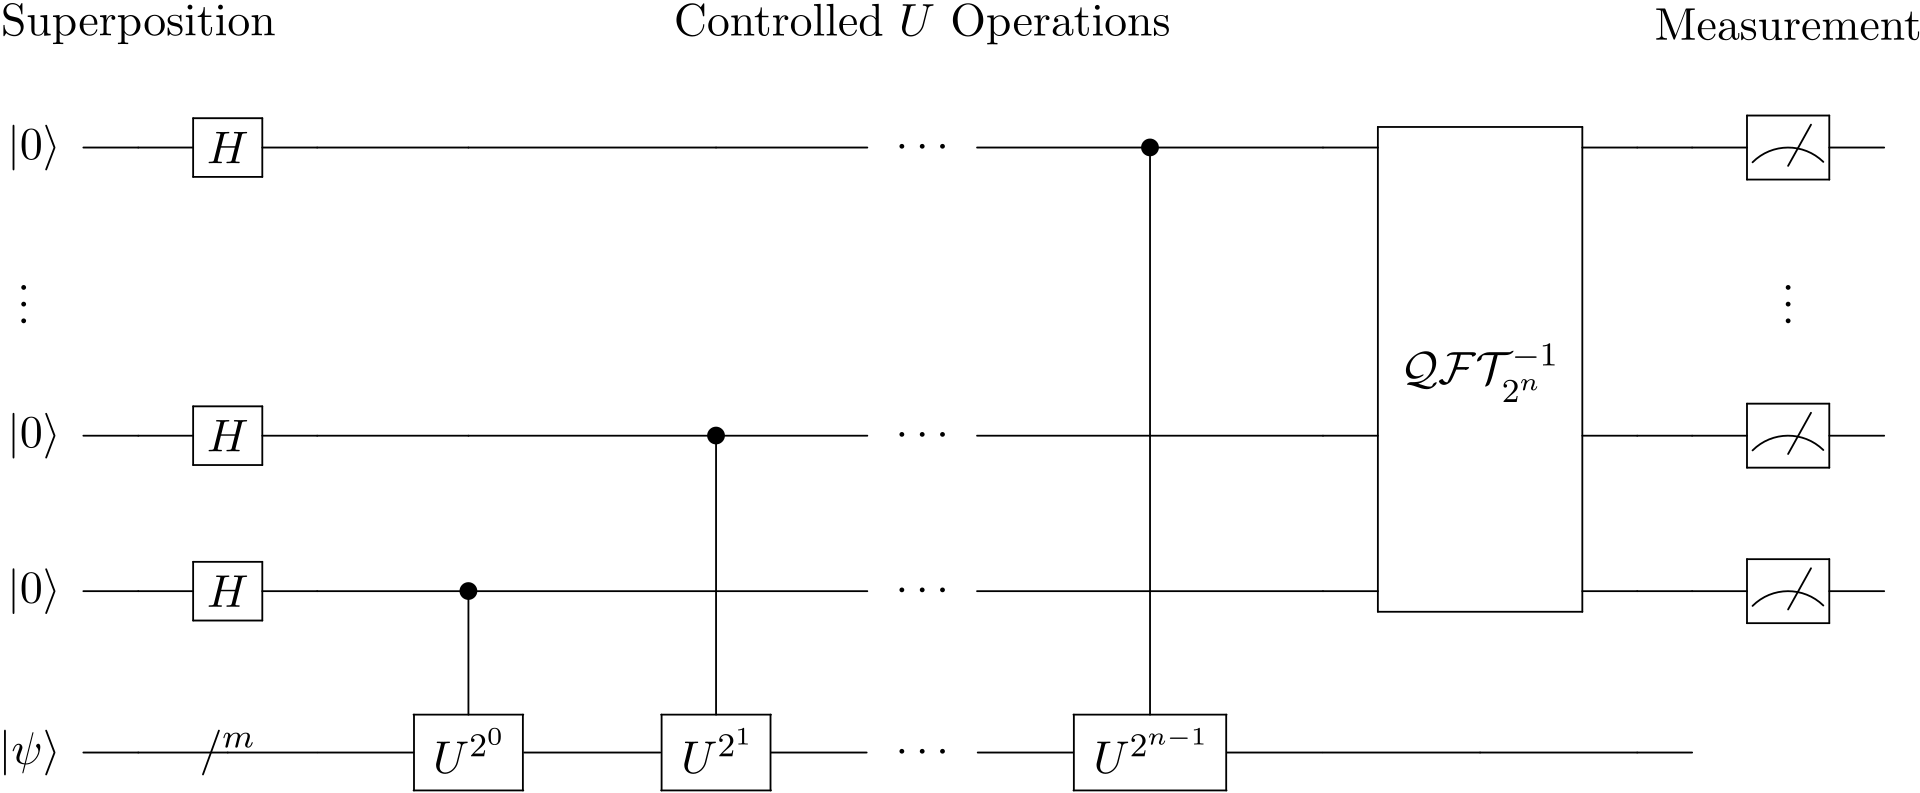
**Figure:** *Quantum circuit for QPE algorithm* **[1]**

As the operator $\hat{U}$ is unitary, the eigenvalue asociated to the eigenvector  $|w\rangle$ is a complex number with module 1 that we can write as $e^{i\theta}$, where $\theta$ is the phase shift we are looking for. That phase can be expressed as $\theta = 2\pi \theta'$ where $\theta' \in [0, 1]$ where represents the angle in turns (or revolutions):

* When $\theta' = 1$, the angle is $2\pi$ radians, meaning one full turn.
* When $\theta' = 0.5$, the angle is $\pi$ radians, meaning half a turn.
* When $\theta' = 0.25$, the angle is $\pi/2$ radians, meaning a quarter turn.

Thus, $\theta'$ intuitively represents the fraction of a full revolution corresponding to the angle $\theta$.

The result of the QPE algorithm is the **binary fraction** of $\theta'$ in **fixed-point** representation.

## Qiskit implementation



This algorithm implementation estimates the phase shift induced by the phase quantum gate $\hat{P}(\theta)$ on its eigenvector $|1\rangle$, defined as: 
$$\hat{P}(\theta)|1\rangle=e^{i\theta}|1\rangle$$  

* Implemented using **Qiskit**.
* Configurable phase and qubit count.
* Example: Estimating the phase introduced by $\hat{P}(\frac{\pi}{9})$ on $|1\rangle$ with multiple qubit count values.

In [51]:
# Import required resources
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from numpy import pi

The algorithm is coded into a function that takes two parameters: the phase to be introduced by the operators and the number of qubits to be used. N-1 qubits will be used for measurments, while the last qubits is reserved as an auxiliar one. The result of the function is the maximum of the measurments distribution.

In [ ]:
#================================= Algorithm settings ===================================

def QPE(phase, N):
# phase ----> Phase shift introduced by the P gates
# N ----> Number of qubits to be used, N-1 for measurments plus one auxiliar
    print("==================================================================================================")
    print("Quantum Phase Estimation with phase =", phase, "and N of qubits =", N)


    #================================== Circuit creation ====================================

    # Defining the circuit
    qc = QuantumCircuit(N, N-1)

    # Prepare the state |1> in the last qubit
    qc.x(N-1)
    qc.barrier()

    # Define a function that applies M controlled phase gates from qubit a to qubit b
    def controlledGates(M, a, b):
        for l in range(M):
            qc.cp(phase, a, b)

    # Loop all the qubits except the last one and apply the controlled gates
    for i in range(N-1):
        qc.h(i)
        controlledGates(2**i, i, N-1)

    # Inverse Quantum Fourier Transform from Qiskit
    iqft = QFT(N-1, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=False, name='QFT^-1')
    qc.append(iqft, qargs=list(range(N-1)))

    # Measurments
    qc.measure(range(N-1), range(N-1))


    # ================================== Display the circuit ===================================

    # Only display the circuit for small amount of qubits
    if N <= 5:
        print("Circuit generated:")
        display(qc.draw("mpl"))
    

    # ============================== Execute the circuit ================================

    sim = Aer.get_backend('qasm_simulator')

    my_circuit = transpile(qc, sim)
    job = sim.run(my_circuit)

    result = job.result()
    counts = result.get_counts()


    # ============================= Plot counts histogram ==============================

    print("Results histogram:")
    display(plot_histogram(counts))


    # ============================= Return the result ===================================

    # Return the maximum value of the results dictionary
    return max(counts, key=counts.get)

### Example: $\theta = \frac{\pi}{9}$

Now, we execute the algorithm several times to see how the number of qubits affects the results. The maximum value of the distribution stands out more if it is closer to $\theta'$ than the other results.

Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 2
Circuit generated:


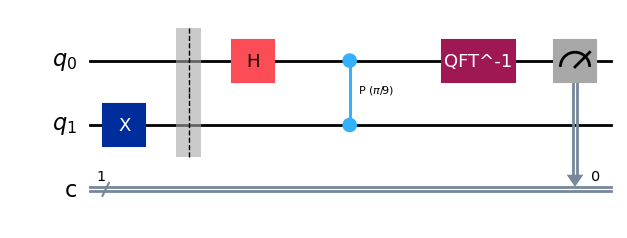

Results histogram:


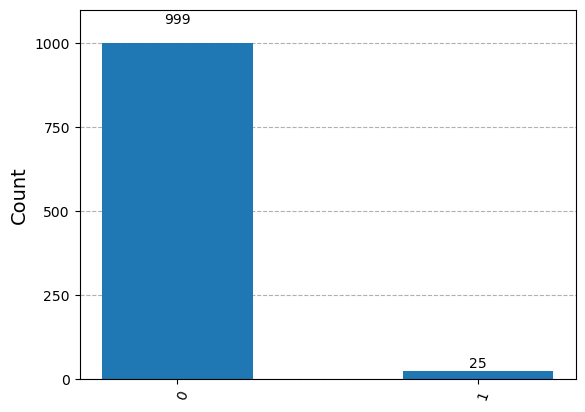

Binary fraction: 0
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 3
Circuit generated:


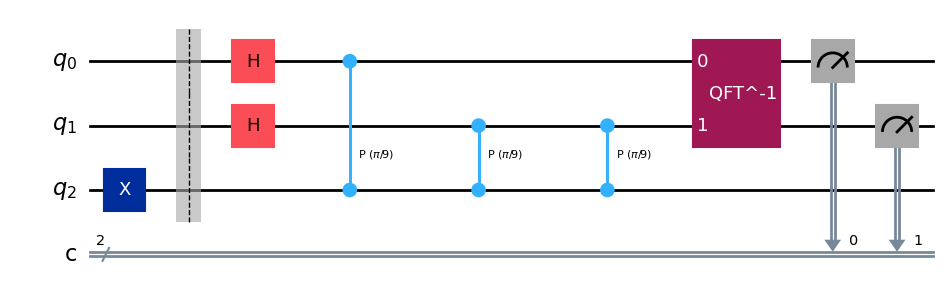

Results histogram:


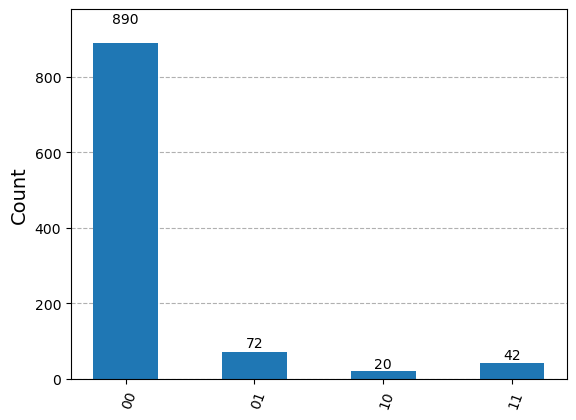

Binary fraction: 00
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 4
Circuit generated:


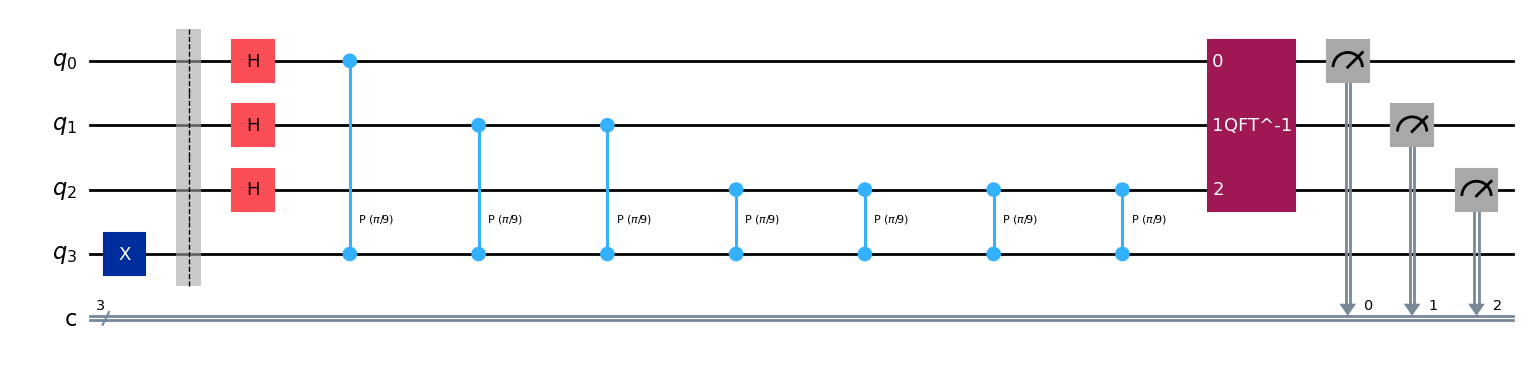

Results histogram:


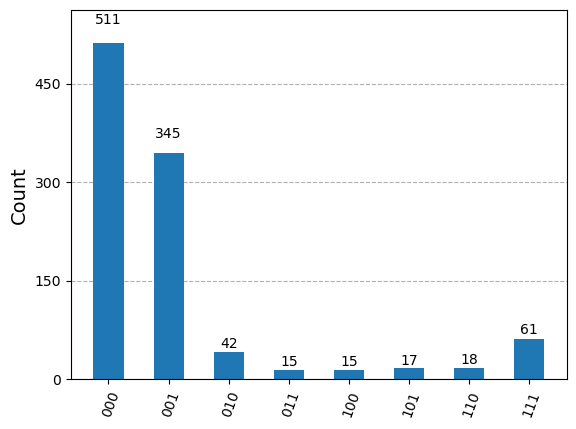

Binary fraction: 000
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 5
Circuit generated:


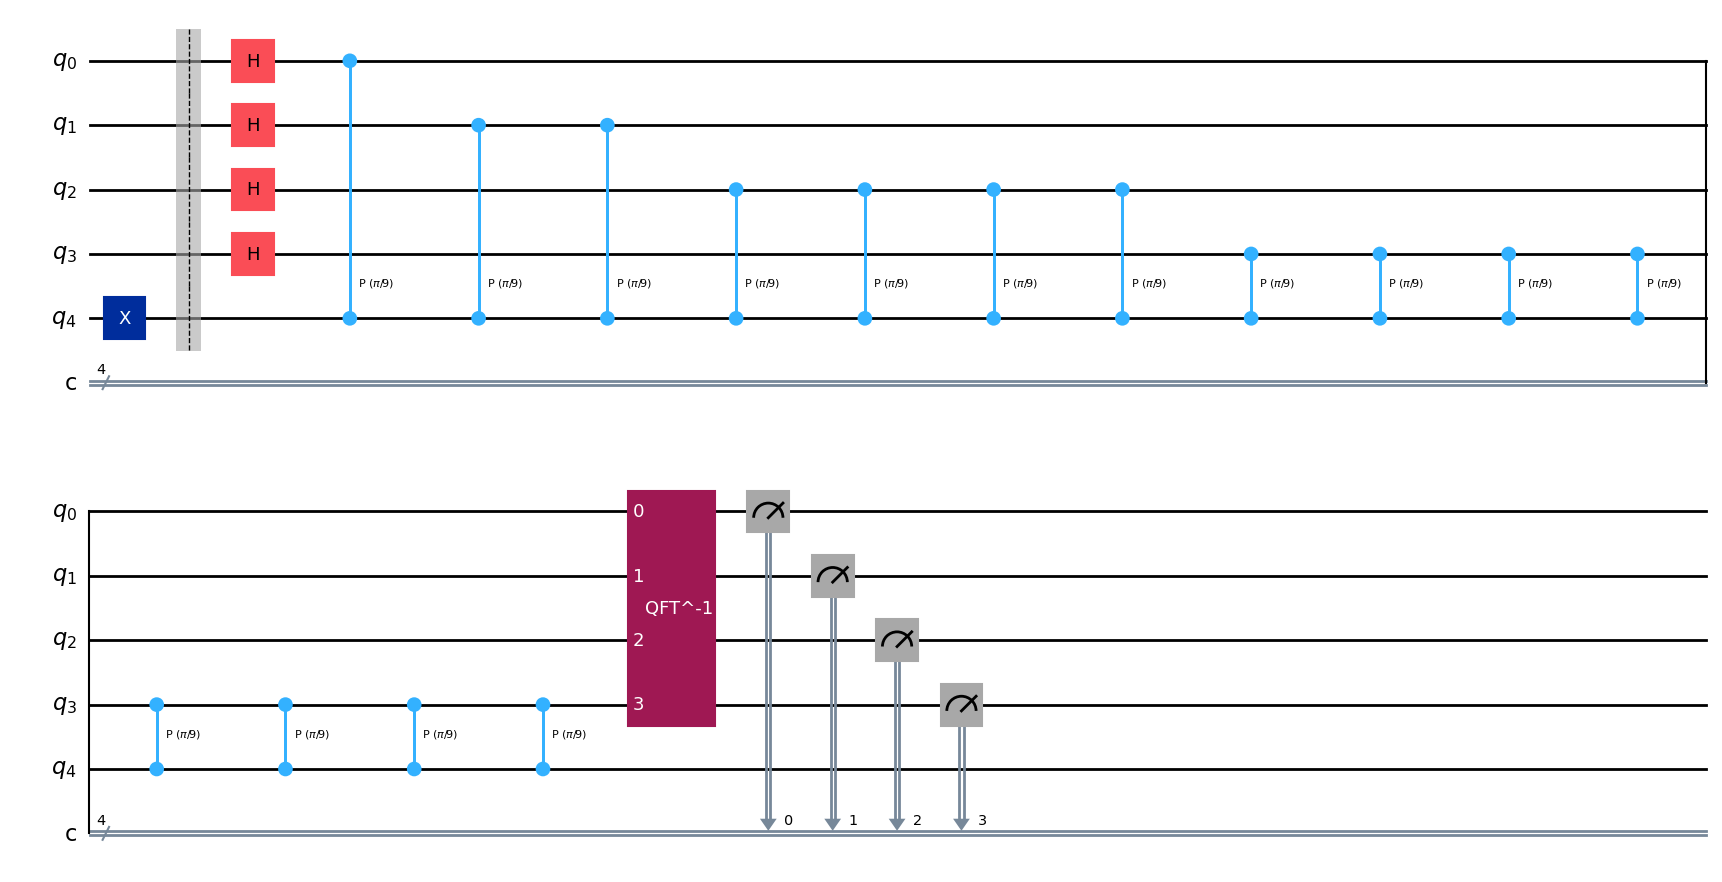

Results histogram:


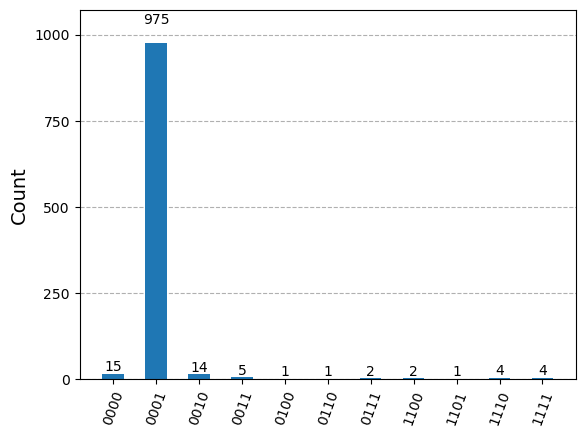

Binary fraction: 0001
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 6
Results histogram:


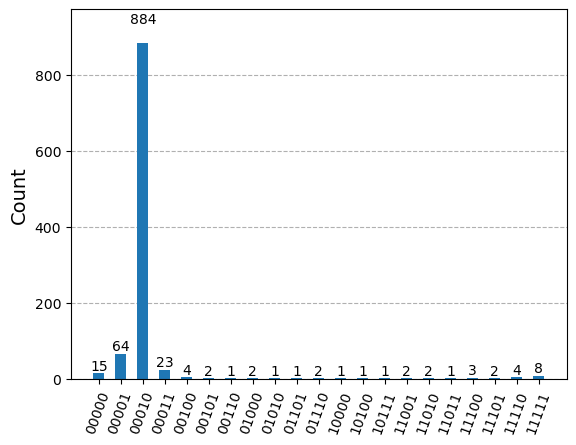

Binary fraction: 00010
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 7
Results histogram:


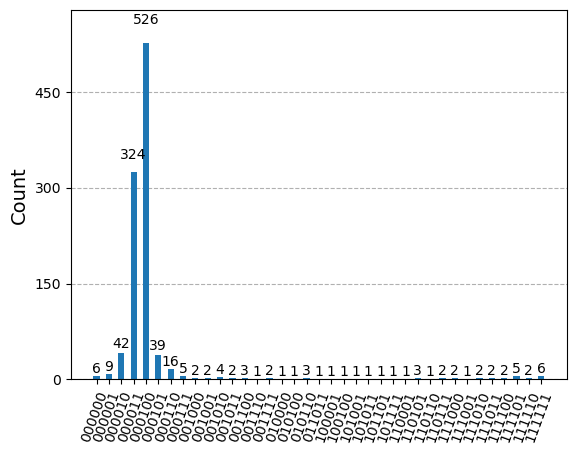

Binary fraction: 000100
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 8
Results histogram:


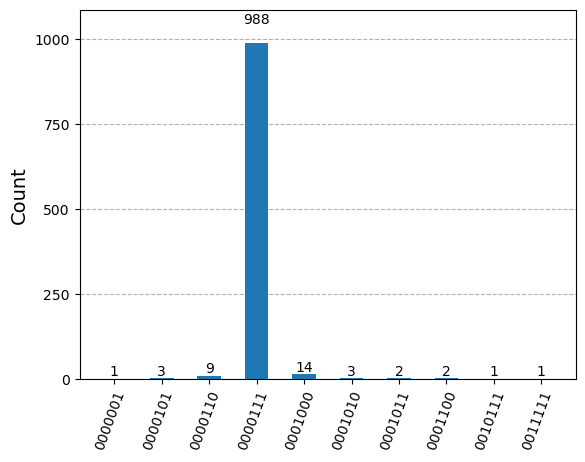

Binary fraction: 0000111
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 9
Results histogram:


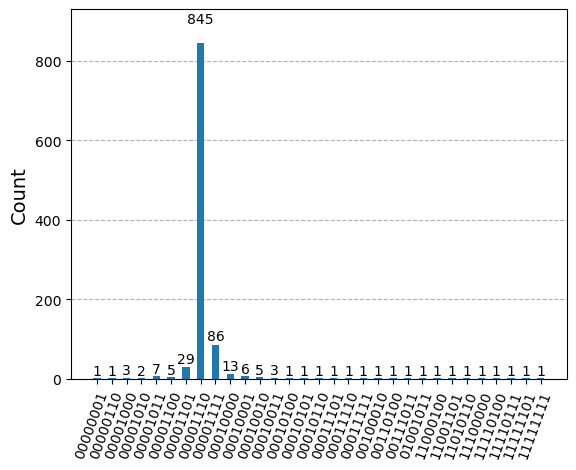

Binary fraction: 00001110
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 10
Results histogram:


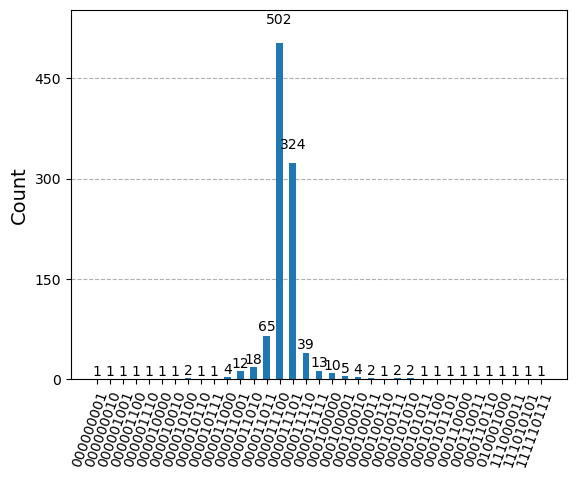

Binary fraction: 000011100
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 11
Results histogram:


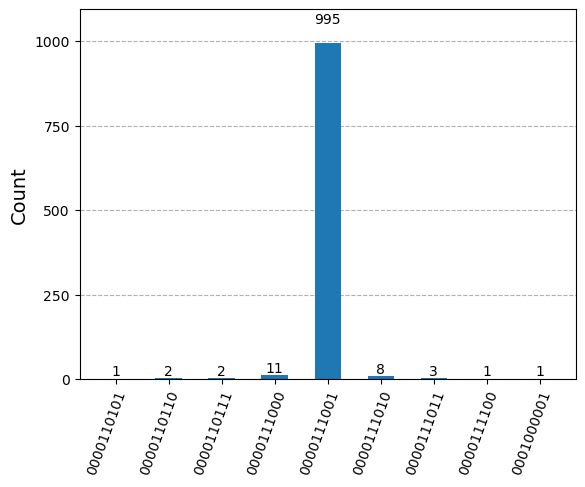

Binary fraction: 0000111001
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 12
Results histogram:


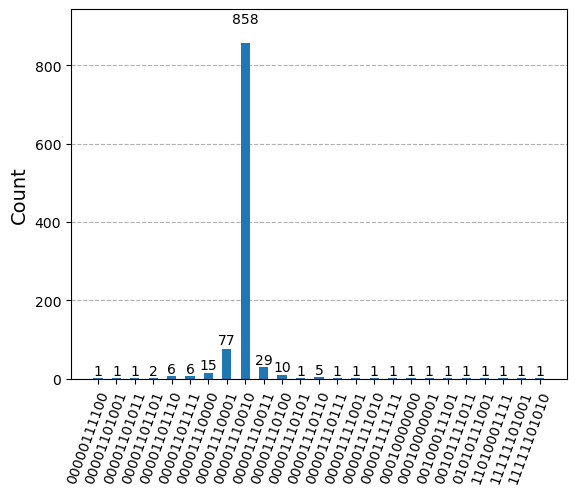

Binary fraction: 00001110010
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 13
Results histogram:


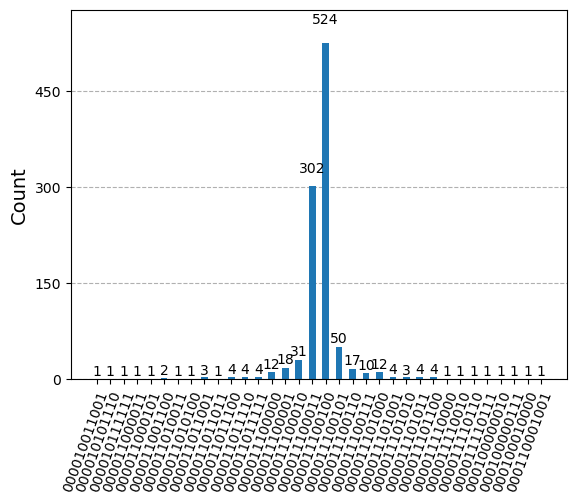

Binary fraction: 000011100100
Quantum Phase Estimation with phase = 0.3490658503988659 and N of qubits = 14
Results histogram:


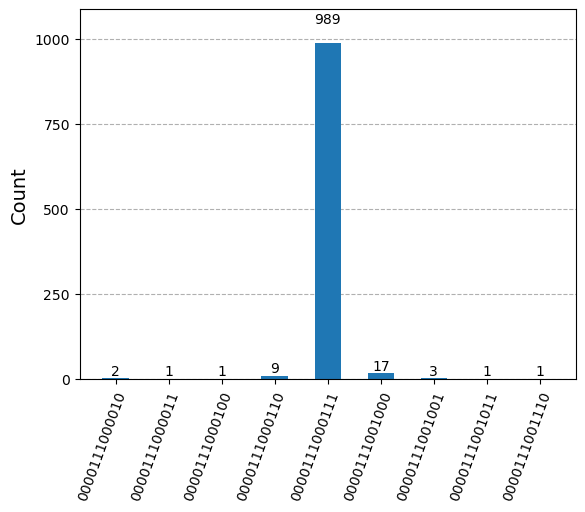

Binary fraction: 0000111000111
========================== Finished Execution ==========================
N of qubits used and binary fraction obtained:
{2: '0', 3: '00', 4: '000', 5: '0001', 6: '00010', 7: '000100', 8: '0000111', 9: '00001110', 10: '000011100', 11: '0000111001', 12: '00001110010', 13: '000011100100', 14: '0000111000111'}


In [ ]:
# Some settings for this example
phase = pi/9
max_qubits = 15


# =========================================== Circuit execution =============================================================

# Dictionary to store the binary fraction obtanied and the number of qubits used in every iteration
binFrac_nQubits_dictionary = {}

# Loop to execute the circuit several times with different number of qubits 
# (2 is the minimum since we need 1 auxiliar qubit)
for n in range(2, max_qubits):
    result = QPE(phase, n)
    print("Binary fraction:", result)
    binFrac_nQubits_dictionary[n]=result

# Print all the algorithm results 
print("========================== Finished Execution ==========================")
print("N of qubits used and binary fraction obtained:")
print(binFrac_nQubits_dictionary)

## Algorithm verification

Given those results of the algorithm, now we can calculate the final phase result from each binary fraction.

The next function calculate the decimal float number from the binary fraction string.

In [86]:
def fraction_binary_to_dec(s):
    dec = 0
    for i in range(len(s)):
        dec += int(s[i])/(2**(i+1))
    return dec

We can parse the results from the dictionary to the previous function and calculate the phase obtained as a funcion of the number of qubits. Store these calculations in a numpy array and plot the results.

The results obtained are: 
 ||N of qubits||phase (rads)||
[[ 2.          0.        ]
 [ 3.          0.        ]
 [ 4.          0.        ]
 [ 5.          0.39269908]
 [ 6.          0.39269908]
 [ 7.          0.39269908]
 [ 8.          0.3436117 ]
 [ 9.          0.3436117 ]
 [10.          0.3436117 ]
 [11.          0.34974762]
 [12.          0.34974762]
 [13.          0.34974762]
 [14.          0.34898063]]


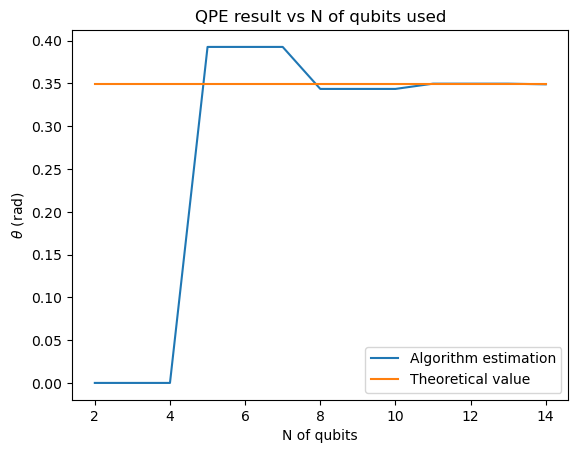

In [105]:
# ============================== Algorithm verification ============================

# Array containing the phase obtained and the number of qubits used in every iteration
phases_Nqubits_array = []

for i in binFrac_nQubits_dictionary:
    phases_Nqubits_array.append([i, 2*pi*fraction_binary_to_dec(binFrac_nQubits_dictionary[i])])

# Converting into NumPy array
import numpy as np
final_result = np.array(phases_Nqubits_array)
print("The results obtained are: \n ||N of qubits||phase (rads)||")
print(final_result)

# Plotting the results and the theoretical value
import matplotlib.pyplot as plt
plt.plot(final_result[:,0], final_result[:,1], label="Algorithm estimation")
plt.plot(final_result[:,0], pi/9*np.ones(len(phases_Nqubits_array)), label="Theoretical value")

plt.title("QPE result vs N of qubits used")

plt.xlabel("N of qubits")
plt.ylabel(r"$\theta$ (rad)")

plt.legend(loc='lower right')


## References

**[1]** By Omrika - File:PhaseCircuit-crop.svg, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=130725910 (Accessed 25/03/2025)